In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


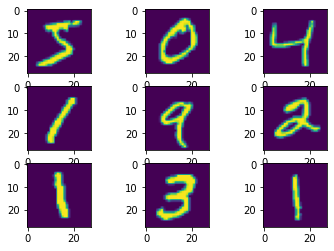

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330 + i + 1) #330 là 3 hàng 3 cột
  plt.imshow(X_train[i])
plt.show()
# Hình màu từ 0 - 255

In [ ]:
X_train =X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train/=255
X_test/=255

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,epochs =20, verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2430 - accuracy: 0.9235 - val_loss: 0.1031 - val_accuracy: 0.9675
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1013 - accuracy: 0.9687 - val_loss: 0.0881 - val_accuracy: 0.9742
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.0774 - val_accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0799 - val_accuracy: 0.9765
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0897 - val_accuracy: 0.9770
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0710 - val_accuracy: 0.9831
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0750 - val_accuracy: 0.980

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1312 - accuracy: 0.9805
Test loss =  0.131225124001503
Test accuracy =  0.9804999828338623


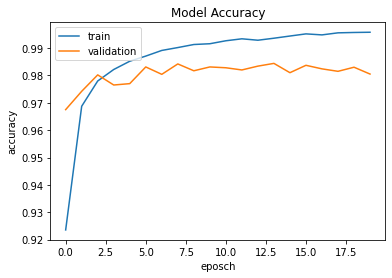

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('eposch')
plt.legend(['train','validation'], loc = 'upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


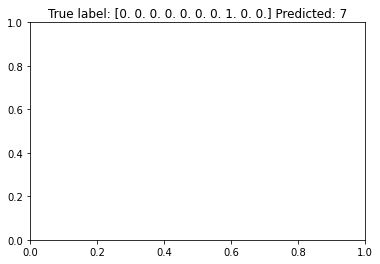

In [ ]:
import numpy as np
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
# plt.imshow(X_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ANN-Mnist-19146241.ipynb')

Mounted at /content/drive
--2022-05-18 10:21:25--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-18 10:21:25 (29.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ANN-Mnist-19146241.ipynb to pdf
[NbConvertApp] Support files will be in ANN-Mnist-19146241_files/
[NbConvertApp] Making directory ./ANN-Mnist-19146241_files
[NbConvertApp] Making directory ./ANN-Mnist-19146241_files
[NbConvertApp] Making directory ./ANN-Mnist-19146241_files
[NbCo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'